### All modifications - repeat 10 times

This experiment involves the default setup for all the parameters, however with the reduced dataset size to 15000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 
Also, we consider two different execution environments, IARAI and TU.

In [1]:
from benchmarking.analysis.analyze_results import *

Data loading function:

In [2]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch", "lightning"]

In [3]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### TU environment

In [4]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/repeated-runs-0212/tu")
base_folder = "0212_run_"


# Load data
results_s3 = load_all_experiments(output_base_folder, base_folder, 11, "/s3/*benchmark_e2e*", "s3")
results_scratch = load_all_experiments(output_base_folder, base_folder, 11, "/scratch/*benchmark_e2e*", "scratch")

Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 201.91it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 287.15it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:18<00:00, 11.43it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 212.61it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 305.40it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.79it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 202.61it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 276.23it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.77it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 217.51it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 288.03it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00,  9.83it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 206.65it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 297.07it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.20it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 206.25it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 314.17it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.00it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 212.92it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 337.94it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00,  9.98it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 191.15it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 249.78it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.59it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 206.61it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 279.52it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.62it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 207.02it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 346.21it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.75it/s]


Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 207.01it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2929.38it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:19<00:00, 11.00it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 185.29it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3248.94it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.70it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 217.80it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3196.82it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.61it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 210.47it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2257.63it/s]

Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.04it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 205.09it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3148.99it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.61it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 196.96it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1312.74it/s]

Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040


timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.65it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 189.29it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2608.41it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:24<00:00,  8.97it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 217.15it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2606.93it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.24it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 202.77it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2993.46it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.62it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 191.42it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2718.15it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.29it/s]


In [5]:
# Check the sizes
print(f"Experiments loaded ... S3: {len(results_s3)}, Scratch: {len(results_scratch)}")

Experiments loaded ... S3: 10, Scratch: 10


In [6]:
results_scratch[0]

,runtime,gpu_util_zero,gpu_util_mean_no_zeros,mem_util_mean,mem_util_mean_no_zeros,implementation,cache,library,throughput,dl_MB,imgs,Mbit/s,MB/s
0,195.838140,8.450704,76.469231,39.031690,43.470588,threaded,1,torch,765.938649,19417.482185,150000,793.205337,99.150667
1,291.006994,3.782506,71.149877,18.007092,20.097625,threaded,1,lightning,515.451528,19417.482185,150000,533.801113,66.725139
2,186.351485,5.371901,77.755459,42.280992,45.475556,asyncio,1,torch,804.930534,16913.542366,150000,726.092090,90.761511
3,285.805732,4.295943,73.840399,19.066826,20.750649,asyncio,1,lightning,524.832021,16913.542366,150000,473.427660,59.178457
4,293.089140,32.885906,72.960000,27.167785,42.020761,vanilla,1,torch,511.789690,16913.542366,150000,461.662752,57.707844
5,1053.782496,66.943734,60.336557,5.369565,18.662222,vanilla,1,lightning,142.344365,16913.542366,150000,128.402530,16.050316


### img/s

In [7]:
throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False, value="throughput") # display = False (doesn't plot histogrms)
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False, value="throughput") # display = False (doesn't plot histogrms)

In [8]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,399.33,431.32,383.07,362.52,368.59,363.46,366.37,363.42,364.36,360.42,376.29,519.65,22.80
threaded_lightning,385.14,405.57,385.16,354.34,361.16,357.71,365.13,363.01,363.05,360.06,370.03,268.71,16.39
asyncio_torch,385.49,393.06,381.34,345.60,345.02,350.22,346.44,349.12,351.27,349.07,359.66,358.03,18.92
asyncio_lightning,388.60,382.24,373.40,358.01,352.24,348.05,355.77,352.48,357.08,355.63,362.35,194.00,13.93
vanilla_torch,40.41,38.91,37.33,38.45,38.33,39.65,40.34,41.07,40.64,40.94,39.61,1.65,1.28
vanilla_lightning,9.14,9.34,9.38,9.60,9.64,9.93,10.11,10.06,10.12,9.64,9.70,0.12,0.35


In [9]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,765.94,776.43,817.79,817.43,820.07,822.14,845.58,830.63,824.95,848.02,816.90,701.96,26.49
threaded_lightning,515.45,513.50,532.30,522.55,526.91,516.76,523.00,520.88,525.94,524.00,522.13,32.75,5.72
asyncio_torch,804.93,815.02,843.88,815.48,825.56,822.88,811.61,810.60,820.18,809.04,817.92,124.15,11.14
asyncio_lightning,524.83,524.81,514.76,525.57,518.29,516.25,520.44,522.50,518.46,518.15,520.41,14.72,3.84
vanilla_torch,511.79,550.61,561.74,562.94,560.93,563.17,564.36,555.63,559.52,562.46,555.32,251.10,15.85
vanilla_lightning,142.34,154.56,155.89,157.13,155.84,156.87,154.48,155.04,156.22,155.76,154.41,18.77,4.33


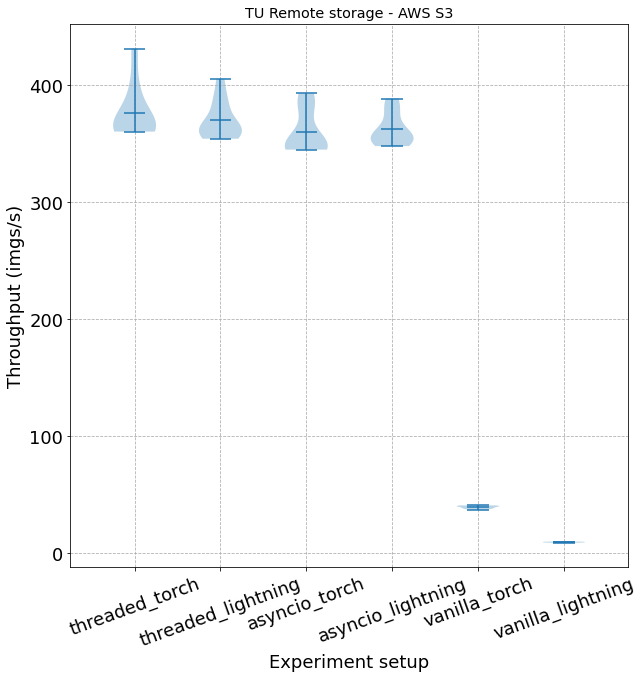

In [10]:
plot_violins(df_t_s3, "TU Remote storage - AWS S3")

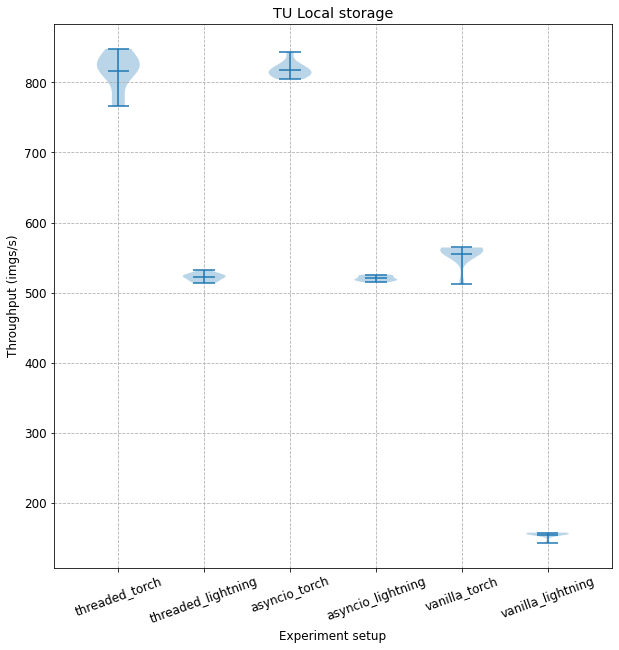

In [11]:
plot_violins(df_t_scratch, "TU Local storage")

In [13]:
### mibts

throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)

In [14]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,272.92,294.78,261.80,247.76,251.91,248.40,250.39,248.38,249.02,246.32,257.17,242.72,15.58
threaded_lightning,263.22,277.18,263.24,242.17,246.83,244.47,249.55,248.10,248.12,246.08,252.90,125.51,11.20
asyncio_torch,348.06,354.89,344.31,312.04,311.52,316.21,312.80,315.22,317.16,315.17,324.74,291.88,17.08
asyncio_lightning,350.87,345.12,337.14,323.25,318.03,314.25,321.22,318.25,322.41,321.10,327.16,158.18,12.58
vanilla_torch,36.48,35.13,33.70,34.71,34.60,35.80,36.42,37.08,36.70,36.96,35.76,1.35,1.16
vanilla_lightning,8.26,8.43,8.47,8.67,8.70,8.96,9.13,9.08,9.13,8.71,8.75,0.10,0.31


In [15]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,793.21,804.07,846.91,846.52,849.27,851.40,875.69,860.20,854.31,878.20,845.98,752.77,27.44
threaded_lightning,533.80,531.78,551.25,541.15,545.67,535.15,541.62,539.43,544.67,542.65,540.72,35.13,5.93
asyncio_torch,726.09,735.19,761.23,735.61,744.70,742.28,732.11,731.20,739.85,729.80,737.81,101.06,10.05
asyncio_lightning,473.43,473.41,464.34,474.09,467.53,465.69,469.47,471.33,467.68,467.40,469.44,11.98,3.46
vanilla_torch,461.66,496.68,506.72,507.80,505.99,508.01,509.08,501.21,504.72,507.37,500.92,204.33,14.29
vanilla_lightning,128.40,139.42,140.62,141.74,140.57,141.50,139.35,139.86,140.92,140.50,139.29,15.26,3.91


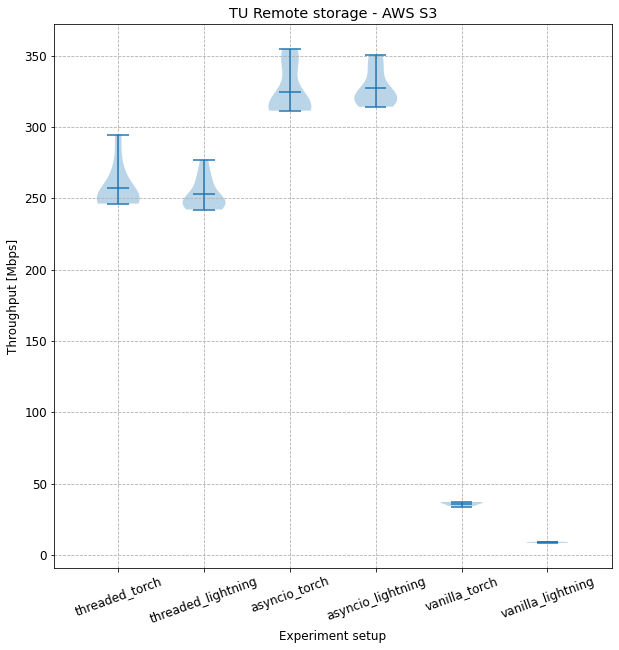

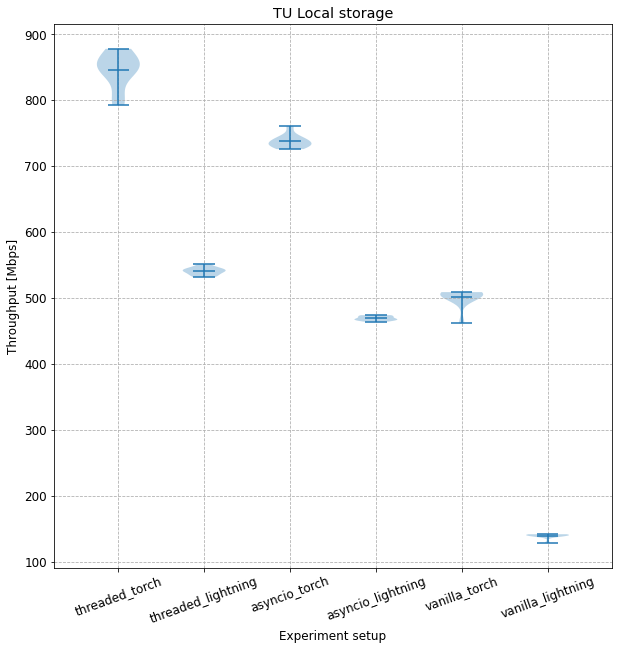

In [16]:
plot_violins(df_t_s3, "TU Remote storage - AWS S3", "Throughput [Mbps]")
plot_violins(df_t_scratch, "TU Local storage", "Throughput [Mbps]")

### IARAI environment

In [17]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/repeated-runs-0212/iarai")
base_folder = "0212_run_"

# Load data
# Load data
results_s3 = load_all_experiments(output_base_folder, base_folder, 11, "/s3/*benchmark_e2e*", "s3")
results_scratch = load_all_experiments(output_base_folder, base_folder, 11, "/scratch/*benchmark_e2e*", "scratch")

Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 187.64it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 365.23it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00,  9.94it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 193.55it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 333.82it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.09it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 184.74it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 282.16it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:25<00:00,  8.31it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 200.20it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 291.21it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.35it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 199.33it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 407.24it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.28it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 210.15it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 322.49it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.60it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 203.79it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 329.69it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.17it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 213.34it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 382.88it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.25it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 213.41it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 501.71it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:23<00:00,  9.37it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 211.45it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 428.82it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.35it/s]


Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 210.33it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4518.69it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.17it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 203.27it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4581.92it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.71it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 203.08it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3621.85it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.36it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 219.91it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4144.68it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.46it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 209.82it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3534.04it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.34it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 210.18it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 3646.81it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.42it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 213.95it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4195.31it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:20<00:00, 10.36it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 170.36it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4155.92it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.62it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 196.96it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4220.13it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:21<00:00, 10.16it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 211.84it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 4588.54it/s]


Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False
Dataset:  15000
Batch size: 256
Epochs:  10
Images total:  150000
Batches per epoch 59
Images total (rounded):  151040
timestamp False


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:22<00:00,  9.51it/s]


In [18]:
# Check the sizes
print(f"Experiments loaded ... S3: {len(results_s3)}, Scratch: {len(results_scratch)}")

Experiments loaded ... S3: 10, Scratch: 10


In [19]:
throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False) # display = False (doesn't plot histogrms)

In [20]:
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False) # display = False (doesn't plot histogrms)

In [21]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,254.81,294.47,263.60,270.62,296.06,259.10,263.11,280.70,276.27,264.52,272.33,205.11,14.32
threaded_lightning,311.39,281.37,293.97,291.39,293.90,281.01,285.26,288.99,287.07,280.80,289.52,84.45,9.19
asyncio_torch,300.49,285.56,256.46,277.53,285.77,269.35,271.00,282.95,285.45,271.31,278.59,148.07,12.17
asyncio_lightning,305.22,283.23,290.63,283.20,290.29,279.66,280.61,283.88,283.16,276.87,285.68,65.43,8.09
vanilla_torch,38.50,39.79,38.96,39.93,40.36,38.58,41.20,42.83,41.76,41.22,40.31,2.06,1.44
vanilla_lightning,8.94,9.00,9.38,9.69,9.60,9.76,9.97,10.35,10.05,9.92,9.67,0.20,0.45


In [22]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,797.32,841.05,839.31,833.56,826.42,843.44,827.64,836.90,803.78,811.30,826.07,268.77,16.39
threaded_lightning,513.07,560.36,552.72,550.47,559.82,555.45,552.31,553.43,530.33,523.67,545.16,274.25,16.56
asyncio_torch,802.24,863.95,842.31,811.98,826.47,827.58,809.18,813.83,798.96,783.59,818.01,532.47,23.08
asyncio_lightning,537.44,552.60,539.20,547.28,558.26,541.16,528.82,527.27,541.37,523.17,539.66,124.97,11.18
vanilla_torch,570.33,554.45,573.75,572.26,565.08,545.69,559.31,554.78,552.43,544.65,559.27,113.65,10.66
vanilla_lightning,160.30,160.40,162.59,161.38,158.68,159.13,159.51,158.73,158.29,156.49,159.55,2.94,1.71


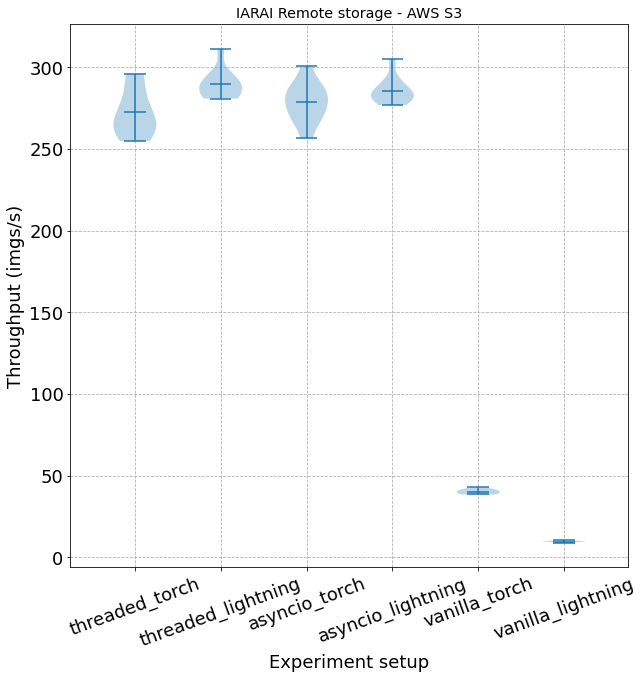

In [23]:
plot_violins(df_t_s3, "IARAI Remote storage - AWS S3")

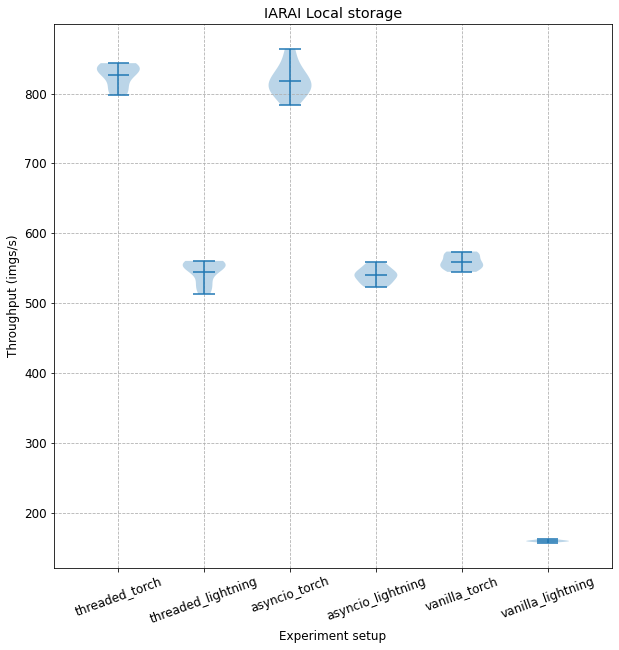

In [24]:
plot_violins(df_t_scratch, "IARAI Local storage")

In [26]:
### mibts
throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)

In [27]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,174.14,201.25,180.16,184.95,202.34,177.08,179.82,191.84,188.81,180.79,186.12,95.80,9.79
threaded_lightning,212.82,192.30,200.91,199.15,200.86,192.05,194.96,197.51,196.20,191.91,197.87,39.46,6.28
asyncio_torch,271.31,257.83,231.56,250.58,258.02,243.20,244.69,255.48,257.73,244.96,251.54,120.68,10.99
asyncio_lightning,275.58,255.73,262.41,255.70,262.10,252.51,253.36,256.31,255.67,249.98,257.94,53.33,7.30
vanilla_torch,34.76,35.93,35.18,36.05,36.44,34.84,37.20,38.67,37.70,37.22,36.40,1.68,1.30
vanilla_lightning,8.07,8.13,8.47,8.75,8.67,8.82,9.00,9.34,9.07,8.95,8.73,0.16,0.41


In [28]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,825.70,870.99,869.19,863.23,855.84,873.46,857.10,866.69,832.40,840.18,855.48,288.21,16.98
threaded_lightning,531.34,580.31,572.40,570.06,579.75,575.22,571.97,573.13,549.21,542.32,564.57,294.03,17.15
asyncio_torch,723.66,779.33,759.81,732.45,745.52,746.52,729.93,734.12,720.71,706.84,737.89,433.26,20.81
asyncio_lightning,484.80,498.48,486.39,493.68,503.58,488.16,477.02,475.63,488.34,471.92,486.80,101.73,10.09
vanilla_torch,514.47,500.15,517.55,516.21,509.73,492.24,504.53,500.44,498.32,491.31,504.50,92.45,9.62
vanilla_lightning,144.60,144.69,146.67,145.57,143.14,143.54,143.89,143.18,142.79,141.17,143.92,2.39,1.54


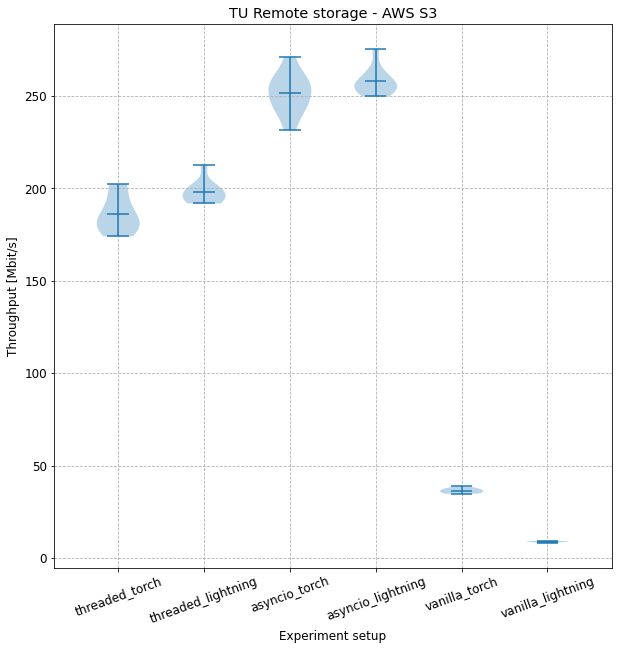

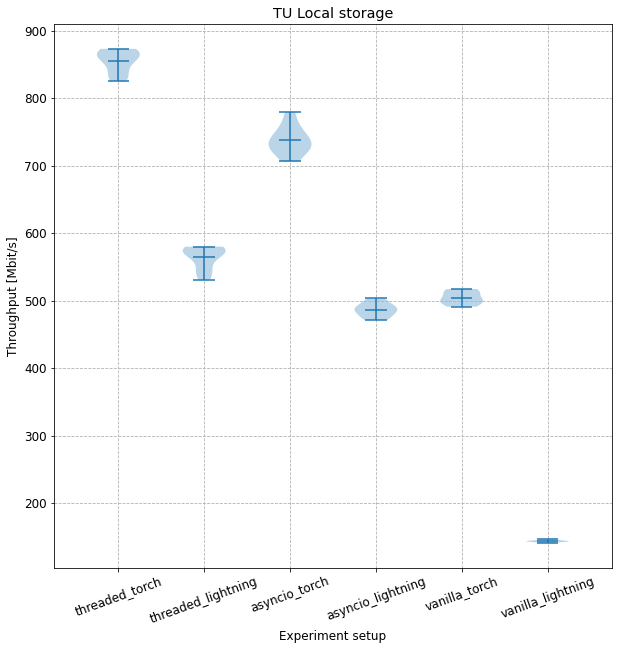

In [30]:
plot_violins(df_t_s3, "TU Remote storage - AWS S3", "Throughput [Mbit/s]")
plot_violins(df_t_scratch, "TU Local storage", "Throughput [Mbit/s]")